<a href="https://colab.research.google.com/github/A-Peoples/DSRP_Project/blob/main/Data_Science_Project_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Packages**

In [155]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt

df = pd.read_csv('/content/500hits.csv',encoding = "latin-1")

In [156]:
df = df.rename(columns={"YRS": "Years_Active",
                        "AB": "At_Bat",
                        "R": "Runs",
                        "H": "Hits",
                        "2B": "Doubles",
                        "3B": "Triples",
                        "HR": "Home_Runs",
                        "RBI": "Runs_Batted",
                        "BB": 'Base_on_Balls',
                        "SO": "Strikeouts",
                        "SB": 'Bases_Stolen',
                        "CS": "Caught_Stealing",
                        "BA": 'Batting_Avg'})

In [157]:
df.describe()

,Years_Active,G,At_Bat,Runs,Hits,Doubles,Triples,Home_Runs,Runs_Batted,Base_on_Balls,Strikeouts,Bases_Stolen,Caught_Stealing,Batting_Avg,HOF
count,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.00000,465.000000,465.000000,465.000000,465.000000,465.000000
mean,17.049462,2048.698925,7511.455914,1150.313978,2170.247312,380.952688,78.554839,201.049462,894.260215,783.56129,847.470968,195.905376,58.083871,0.288712,0.329032
std,2.765186,354.391805,1294.065992,289.635071,424.190773,96.483460,49.363030,143.622664,486.193456,327.43195,489.224289,181.845543,48.027509,0.021208,0.474928
min,11.000000,1331.000000,4981.000000,601.000000,1660.000000,177.000000,3.000000,9.000000,0.000000,239.00000,0.000000,7.000000,0.000000,0.246000,0.000000
25%,15.000000,1802.000000,6523.000000,936.000000,1838.000000,312.000000,41.000000,79.000000,640.000000,535.00000,436.000000,63.000000,22.000000,0.273000,0.000000
50%,17.000000,1993.000000,7241.000000,1104.000000,2076.000000,366.000000,67.000000,178.000000,968.000000,736.00000,825.000000,137.000000,52.000000,0.287000,0.000000
75%,19.000000,2247.000000,8180.000000,1296.000000,2375.000000,436.000000,107.000000,292.000000,1206.000000,955.00000,1226.000000,285.000000,84.000000,0.300000,1.000000
max,26.000000,3308.000000,12364.000000,2295.000000,4189.000000,792.000000,309.000000,755.000000,2297.000000,2190.00000,2597.000000,1406.000000,335.000000,0.366000,2.000000


In [158]:
hof_df = df.loc[df['HOF'] == 1]
no_hof_df = df.loc[df['HOF'] == 0]

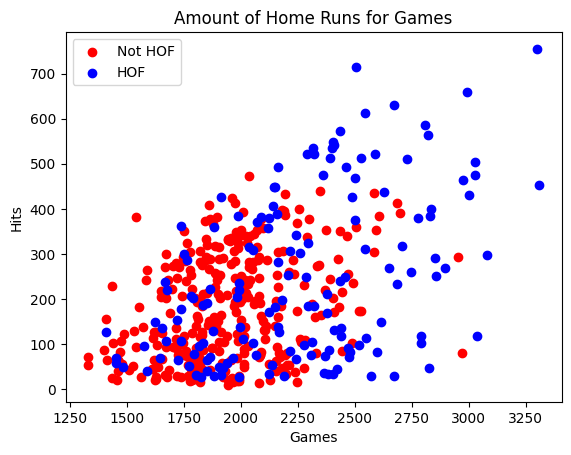

In [159]:
plt.scatter(no_hof_df['G'], no_hof_df['Home_Runs'], color='red')
plt.xlabel('Games')
plt.ylabel('Hits')
plt.title('Amount of Hits for Games')

plt.scatter(hof_df['G'], hof_df['Home_Runs'], color='blue')
plt.xlabel('Games')
plt.ylabel('Hits')
plt.title('Amount of Home Runs for Games')

plt.legend(["Not HOF", "HOF"])

(array([ 6.,  7., 13., 32., 18., 21., 28., 13.,  7.,  6.]),
 array([12. , 13.3, 14.6, 15.9, 17.2, 18.5, 19.8, 21.1, 22.4, 23.7, 25. ]),
 <BarContainer object of 10 artists>)

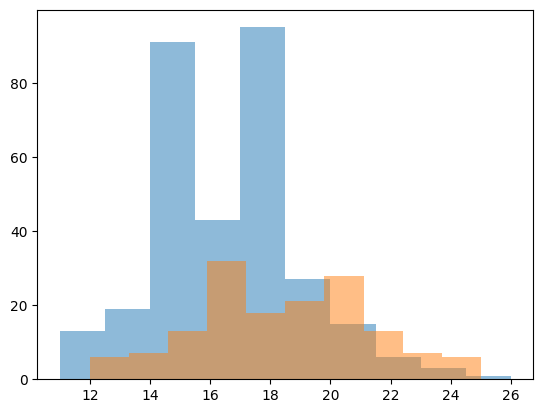

In [177]:
plt.hist(no_hof_df['Years_Active'], alpha=0.5, label='HOF')
plt.hist(hof_df['Years_Active'], alpha=0.5, label='HOF')

In [160]:
strike_df  = df.sort_values(by="Strikeouts", ascending=False)

strikes_df = strike_df[['PLAYER', 'Strikeouts', 'At_Bat', 'Bases_Stolen']]

strike_df['Batting_Avg'] = (strike_df['Hits'] / strike_df['At_Bat'])

strike_df['Batting_Avg']

,Batting_Avg
60,0.261963
87,0.276419
188,0.288167
102,0.281569
378,0.248756
...,...
129,0.294187
422,0.303238
322,0.284571
404,0.310777


In [161]:
strike_df = strike_df[['PLAYER', 'Years_Active', 'G', 'At_Bat', 'Runs', 'Hits', 'Doubles',
       'Triples', 'Home_Runs', 'Runs_Batted', 'Base_on_Balls', 'Strikeouts',
       'Bases_Stolen', 'Caught_Stealing', 'Batting_Avg', 'HOF']]

cols = ['At_Bat', 'Runs', 'Hits', 'Doubles',
       'Triples', 'Home_Runs', 'Runs_Batted', 'Base_on_Balls', 'Strikeouts',
       'Bases_Stolen', 'Caught_Stealing', 'Batting_Avg', 'HOF']

strike_df = strike_df.sort_values(by=["Batting_Avg", 'At_Bat'], ascending=False)
num_df = strike_df[cols]
med_df = strike_df[cols].mean().reset_index()

med_df

,index,0
0,At_Bat,7511.455914
1,Runs,1150.313978
2,Hits,2170.247312
3,Doubles,380.952688
4,Triples,78.554839
5,Home_Runs,201.049462
6,Runs_Batted,894.260215
7,Base_on_Balls,783.561290
8,Strikeouts,847.470968
9,Bases_Stolen,195.905376


In [164]:
x = strike_df.describe()

x = x.head(7).tail(1)
x['PLAYER'] = "75%"
standard_df = pd.concat([strike_df, x])

standard_df.tail(1)

,PLAYER,Years_Active,G,At_Bat,Runs,Hits,Doubles,Triples,Home_Runs,Runs_Batted,Base_on_Balls,Strikeouts,Bases_Stolen,Caught_Stealing,Batting_Avg,HOF
75%,75%,19.0,2247.0,8180.0,1296.0,2375.0,436.0,107.0,292.0,1206.0,955.0,1226.0,285.0,84.0,0.300231,1.0
